Handling spectral energy distributions
==============================

This notebook illustrates how to use the `sed` module of [`nmmn`](https://github.com/rsnemmen/nmmn). This module is very convenient for dealing with spectral energy distributions (SEDs)—the distributions of luminosity $\nu L_\nu$ as a function of $\nu$. 

Often, we have different SEDs, for example the emission from different components of a flow, or spectra corresponding to different AGNs, and we want to perform operations on them. For example, we may want to sum them up, or average them, or compute the bolometric luminosity. This module does it all and this notebook illustrates some of the functionalities.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nmmn.sed as sed

# Read the SED data files

We will import model SEDs corresponding to the components of the flow appropriate for NGC 3031 as reported in [Nemmen et al (2014)](https://academic.oup.com/mnras/article/438/4/2804/2907740): a radiatively inefficient accretion flow (aka RIAF), a thin disk and a relativistic jet. 

Each file consists of two columns which are $\log \nu$ (Hz) and $\log \nu L_\nu$ (erg/s), respectively. The `logfmt` parameter makes sure we read them correctly.

In [36]:
riaf=sed.SED(file='ngc3031.adaf',logfmt=1)
thin=sed.SED(file='ngc3031.ssd',logfmt=1)
jet=sed.SED(file='ngc3031.jet',logfmt=1)

The arrays of frequency and luminosity are available at `riaf.lognu` and `riaf.ll`. There are several other arrays as well.

Just to make sure we read them correctly, let's plot the SEDs

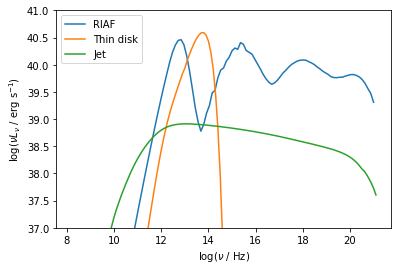

In [4]:
plot(riaf.lognu,riaf.ll,label='RIAF')
plot(thin.lognu,thin.ll,label='Thin disk')
plot(jet.lognu,jet.ll,label='Jet')
ylim(37,41)
xlabel('log($\\nu$ / Hz)')
ylabel('log($\\nu L_\\nu$ / erg s$^{-1}$)')
legend()

`sed` support several different types of input formats for the SEDs. Check out the methods `erac`, `hayden`, `prieto` and `grmonty`.

# Compute the bolometric luminosity and other properties

Get the bolometric luminosity

In [19]:
lumbol=riaf.bol()

f'Lbol = {lumbol:.1e}'

'Lbol = 2.0e+41'

Compute the X-ray luminosity in the 2-10 keV band. The first number is the luminosity and the second is the photon index

In [21]:
riaf.xrays()

(1.8229305687937634e+40, 2.034146578231296)

Radio-loudness (Kellermann criterion)

In [22]:
jet.radioloud()

984.536296509233

Extract the luminosity at a given value of $\log \nu$, using interpolation. In this case, we choose the frequency corresponding to 5 GHz. The numbers correspond to the nearest frequency ($\log \nu$) to the input, and the corresponding $L_\nu$.

In [24]:
jet.findlum(9.7)

[9.695695695695695, 9.932080714180598e+26]

Get $\alpha_{\rm ox}$—the power-law index of a straight line in log-log space connecting the optical to the X-rays

In [25]:
riaf.alphaox()

-1.0932863637790047

# Add SEDs

Let's add the three SEDs. Interpolation is performed as required.

In [26]:
summed=sed.sum([riaf,jet,thin])

Let's see the resulting SED with the sum

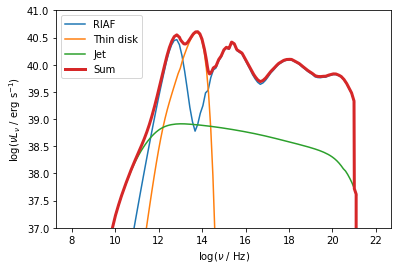

In [31]:
plot(riaf.lognu,riaf.ll,label='RIAF')
plot(thin.lognu,thin.ll,label='Thin disk')
plot(jet.lognu,jet.ll,label='Jet')
plot(summed.lognu,summed.ll,label='Sum',lw=3)
ylim(37,41)
xlabel('log($\\nu$ / Hz)')
ylabel('log($\\nu L_\\nu$ / erg s$^{-1}$)')
legend()

# Average

We can also easily compute the mean SED. In this example, I will compute the average of the RIAF and jet SEDs because they extend from radio to X-rays. `m` below is a SED object with the resulting average. `sdm` is the standard deviation for plotting the range of variation in the shape of the SED.

You have to choose the reference frequency at which they will be normalized to the same luminosity (default 1E40 erg/s). The parameter `xray=True` normalizes all the SEDs to have the same X-ray luminosity in the 2-10 keV band.

In [ ]:
[m,sdm]=riaf.mean(seds=[riaf,jet], refnlnu=1e40, xray=1)

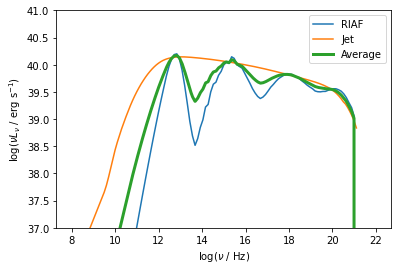

In [35]:
plot(riaf.lognu,riaf.ll,label='RIAF')
plot(jet.lognu,jet.ll,label='Jet')
plot(m.lognu,m.ll,label='Average',lw=3)
ylim(37,41)
xlabel('log($\\nu$ / Hz)')
ylabel('log($\\nu L_\\nu$ / erg s$^{-1}$)')
legend()

Notice how the SEDs were normalized to have the same X-ray luminosity.